<a href="https://colab.research.google.com/github/himaneetripathi/SalesPrediction/blob/main/Copy_of_himanee_02_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Core Project

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
from google.colab import drive
drive.mount("/content/drive")
drive.mount("/content/drive", force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive


In [41]:
df = pd.read_csv('/content/drive/MyDrive/Data/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [42]:
df.shape     #Gives count of rows and columns of data

(8523, 12)

In [43]:
df.dtypes          #to get info about type of data

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [44]:
df.info()        #to get info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [45]:
dups = df.duplicated()       #to identify duplicates
dups

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [46]:
df = df.drop_duplicates()      #to drop duplicates
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [47]:
df.isna().sum()      #finding missing value and count

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [48]:
df['Outlet_Size'].fillna('Medium' , inplace = True)     #replacing missing value
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [49]:
df['Item_Weight'].mean()

12.857645184136183

In [50]:
df['Item_Weight'].fillna( df['Item_Weight'].mean() , inplace = True)     #Replacing missing value with mean
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [51]:
df.isna().sum()       # To Confirm that there are no missing values after addressing them.

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [52]:
# To fix any inconsistent categories of data (example: fix cat, Cat, and cats
df['Item_Fat_Content'].replace({'LF' : 'Low Fat'}, inplace=True)     
df['Item_Fat_Content'].replace({'Low fat' : 'Low Fat'}, inplace=True )
df['Item_Fat_Content'].replace({'low fat' : 'Low Fat'}, inplace=True)
df['Item_Fat_Content'].replace({'reg' : 'Regular'}, inplace=True)


In [53]:
df['Item_Fat_Content'].unique()    #To verify that the inconsistencies are fixed

array(['Low Fat', 'Regular'], dtype=object)

In [54]:
df.groupby('Item_Type')['Item_MRP'].mean()   #for grouping Item types with their MRP

Item_Type
Baking Goods             126.380766
Breads                   140.952669
Breakfast                141.788151
Canned                   139.763832
Dairy                    148.499208
Frozen Foods             138.503366
Fruits and Vegetables    144.581235
Hard Drinks              137.077928
Health and Hygiene       130.818921
Household                149.424753
Meat                     139.882032
Others                   132.851430
Seafood                  141.841719
Snack Foods              146.194934
Soft Drinks              131.492506
Starchy Foods            147.838023
Name: Item_MRP, dtype: float64

In [55]:
df.describe()     #For any numerical columns, obtain the summary statistics of each (min, max, mean)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Histogram to view the distributions of various features in the datase

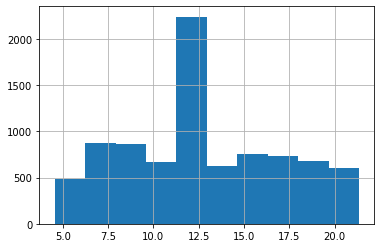

In [56]:
df['Item_Weight'].hist()

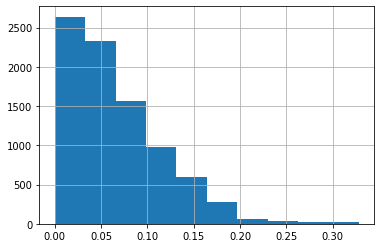

In [57]:
df['Item_Visibility'].hist()

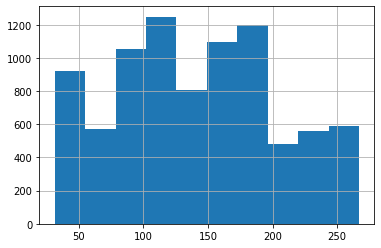

In [58]:
df['Item_MRP'].hist()

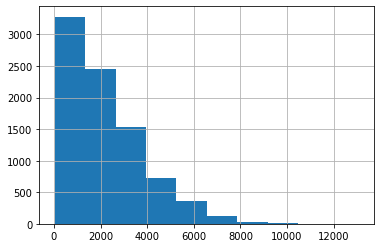

In [59]:
df['Item_Outlet_Sales'].hist()

To show Correlation between columns

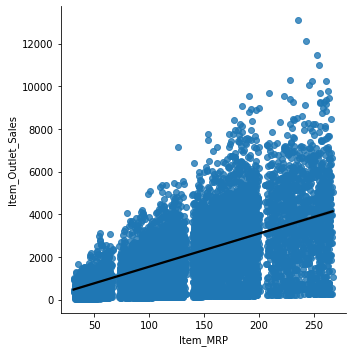

In [60]:
sns.lmplot(data=df , x='Item_MRP' , y='Item_Outlet_Sales' , line_kws ={'color' : 'black'})

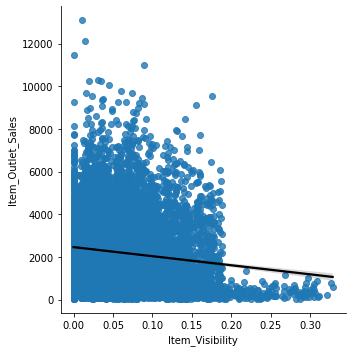

In [61]:
sns.lmplot(data=df , x='Item_Visibility' , y='Item_Outlet_Sales' ,line_kws ={'color' : 'black'} )

Boxplot to view statistical summaries of various features in your dataset

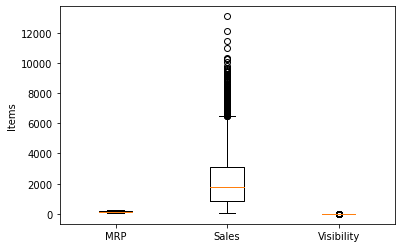

In [62]:
plt.ylabel('Items')
MRP = df['Item_MRP']
Sales = df['Item_Outlet_Sales']
Visibility = df['Item_Visibility']
plt.boxplot([MRP , Sales , Visibility], labels=['MRP','Sales' , 'Visibility']);


To create a heatmap to show any potential correlation in data 

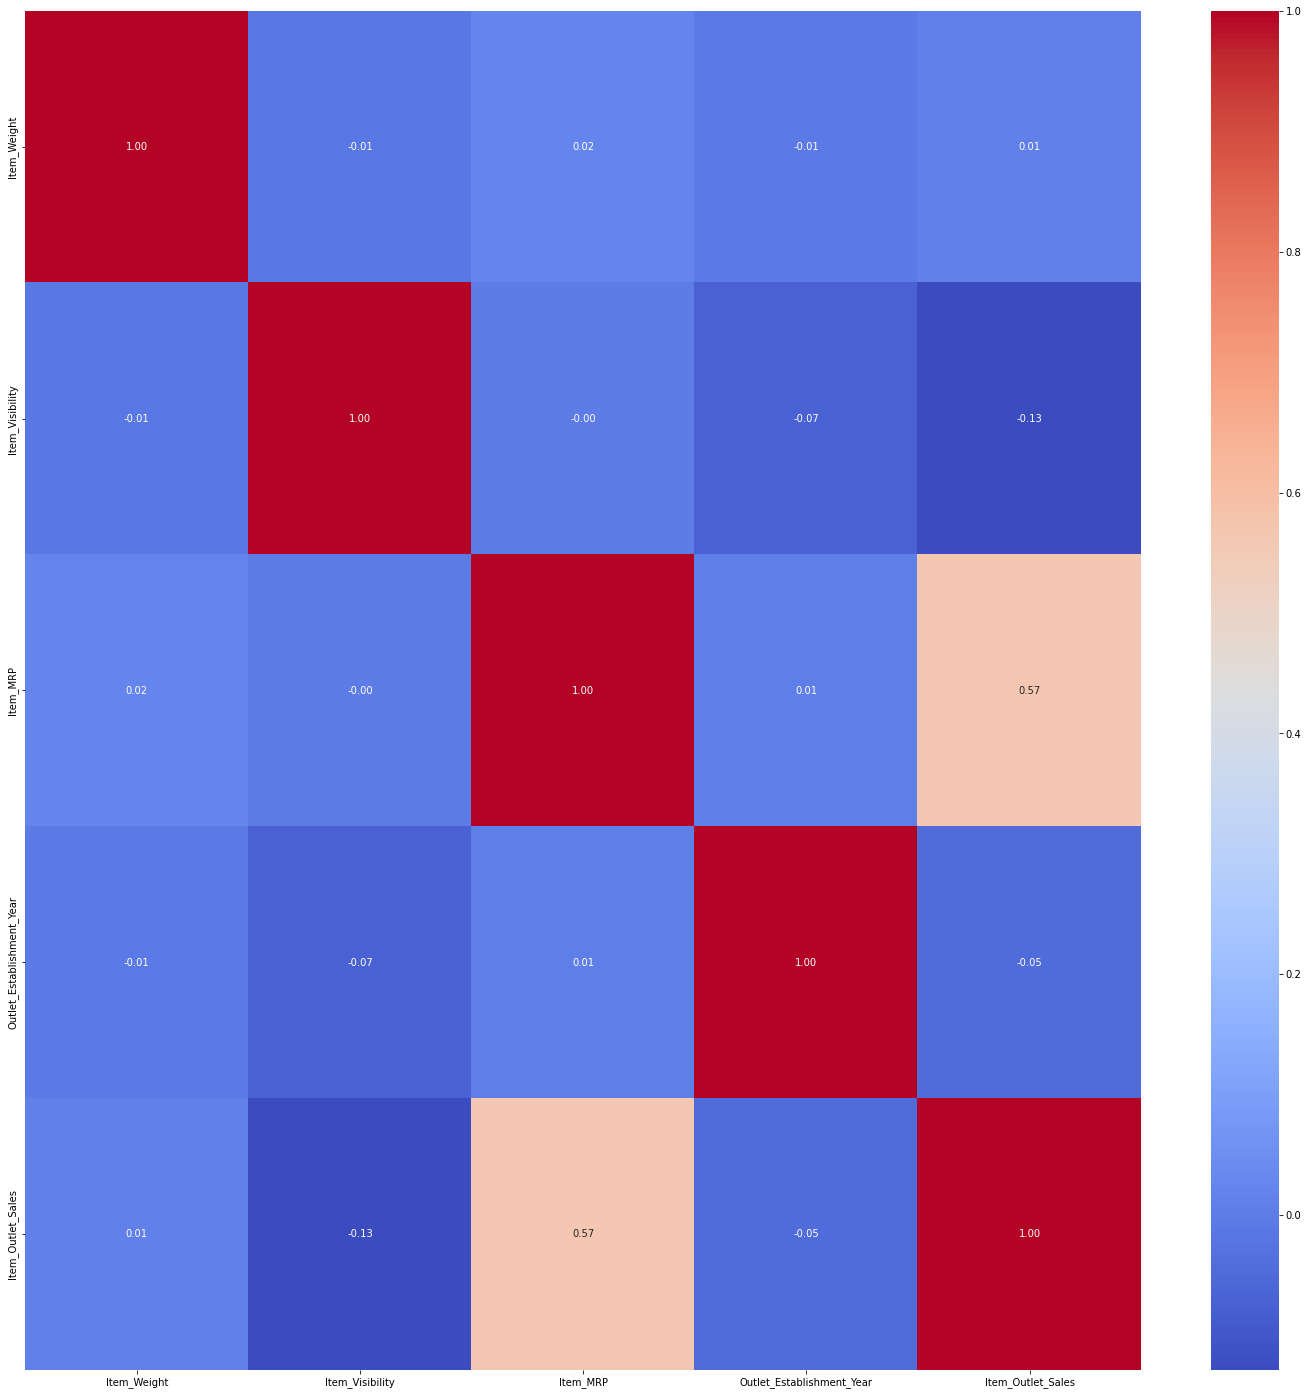

In [63]:
corr = df.drop(columns = 'Item_Type').corr()
plt.figure(figsize = (25,25))
sns.heatmap(corr, cmap = 'coolwarm' , annot=True , fmt='0.2f')

Explanatory data analysis

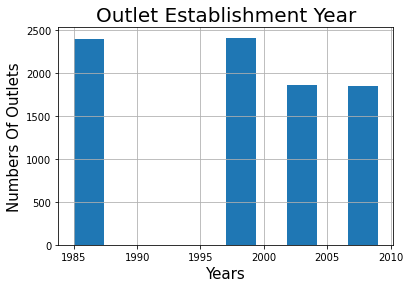

In [64]:
#df['Outlet_Establishment_Year']
plt.title('Outlet Establishment Year', fontsize = 20)
plt.ylabel('Numbers Of Outlets', fontsize = 15)
plt.xlabel('Years', fontsize = 15)
df['Outlet_Establishment_Year'].hist()

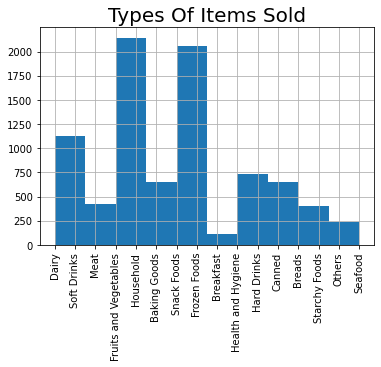

In [65]:
plt.title('Types Of Items Sold', fontsize = 20)
df['Item_Type'].hist()
plt.xticks(rotation=90);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


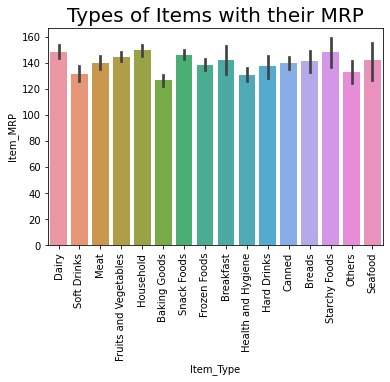

In [66]:
plt.title('Types of Items with their MRP', fontsize = 20)
sns.barplot(df['Item_Type'], x='Items', y=df['Item_MRP'])
plt.xticks(rotation=90);

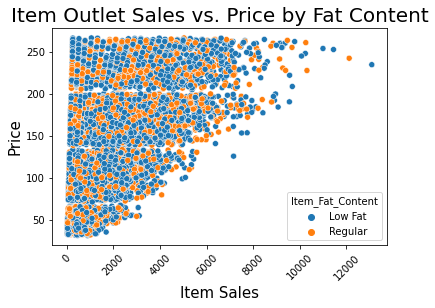

In [67]:
sns.scatterplot(data=df ,x='Item_Outlet_Sales' , y=df['Item_MRP'] , hue='Item_Fat_Content')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Item Outlet Sales vs. Price by Fat Content', fontsize=20)
plt.xlabel('Item Sales', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(rotation = 45);

